In [1]:
import stanza #Main NLP tool used
import pandas as pd #pandas
import numpy as np #numpy
import seaborn as sns #seaborn for dataviz
import matplotlib.pyplot as plt #matplotlib for data viz
%matplotlib inline

# UPOS Reference List

    ADJ: adjective
    ADP: adposition
    ADV: adverb
    AUX: auxiliary
    CCONJ: coordinating conjunction
    DET: determiner
    INTJ: interjection
    NOUN: noun
    NUM: numeral
    PART: particle
    PRON: pronoun
    PROPN: proper noun
    PUNCT: punctuation
    SCONJ: subordinating conjunction
    SYM: symbol
    VERB: verb
    X: other


# Sentiment Analysis Reference:

negative, neutral, positive = 0, 1, 2

# Setup Stanza NLP with Pre-trained English Language Model

In [2]:
print('Downloading English model...')
stanza.download('en') #Download pre-trained NLP english language model

2021-02-14 08:58:34 INFO: Downloading default packages for language: en (English)...
2021-02-14 08:58:39 INFO: File exists: /home/neon/stanza_resources/en/default.zip.
2021-02-14 08:58:43 INFO: Finished downloading models and saved to /home/neon/stanza_resources.


In [3]:
print('Building an English pipeline...')
en_nlp = stanza.Pipeline('en') #Setup english language pipeline with default processors

2021-02-14 08:58:44 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-14 08:58:44 INFO: Use device: cpu
2021-02-14 08:58:44 INFO: Loading: tokenize
2021-02-14 08:58:44 INFO: Loading: pos


Building an English pipeline...


2021-02-14 08:58:45 INFO: Loading: lemma
2021-02-14 08:58:45 INFO: Loading: depparse
2021-02-14 08:58:46 INFO: Loading: sentiment
2021-02-14 08:58:47 INFO: Loading: ner
2021-02-14 08:58:49 INFO: Done loading processors!


# Setup for Processing Stanza .to_dict() Objects into Pandas DataFrames

In [4]:
class Section:
    
    def __init__(self, doc):
        self.doc = doc #Processed Stanza document
        self.section = doc.to_dict() #Converted stanza document (into python object as lists of dicts)
        self.sentences = len(self.doc.sentences) #Number of sentences in section (i.e. section length)
        self.indices = [num for num in range(0,self.sentences)] #List from zero to section length 
        
    def get_hier(self, sent_no_str, sent_loc_ind):
    
        '''Input the index number of the sentence as a string, i.e. "Sentence 1",
        then give the sentence index location in the list of dicts, and include name for new df'''

        outside = [str(sent_no_str)]*len(self.section[sent_loc_ind]) #Outer index for multi-index
        inside = list(range(len(self.section[sent_loc_ind]))) #Inner index for multi-index
        hier_index = list(zip(outside,inside)) #Zip lists together to create multi-index
        multi_index = pd.MultiIndex.from_tuples(hier_index) #multi-index
    
        df = pd.DataFrame(self.section[sent_loc_ind], index = multi_index) #Create pd.DataFrame of section with multi-index
        df.drop('id',axis=1,inplace=True) #Drop redundant 'id' column
    
        return df #Return multi-indexxed pd.DataFrame object
    
    def frame_concat(self):
        
        '''Iterates through the converted stanza doc, and creates a df with the get_hier() function for each sentence's dictionary,
        then concatenates the individual sentence df's together into a section df'''

        df_list = [] #empty list to hold dataframes
    
        while len(df_list) < self.sentences: #Loop to continue iterating until last sentence
    
            for i in self.indices: #Index control
    
                sent_no = f'Sent {self.indices[i]}' #Fed into the multi-index in get_hier function
                df_no = f'df {self.indices[i]}' #df name per sentence
                df_no = self.get_hier(sent_no,self.indices[i]) #Call get_hier function and create a df per sentence
                df_list.append(df_no) #Append the df to the list to be concatenated
            
        df = pd.concat(df_list) #Concatenate all df's into a section df
    
        return df #Return section df
    
    def sent_length(self): 
        
        '''Returns a list of the length of each sentence in the section'''
    
        sent_lengths = [] #empty list to hold sentence lengths
        for sent in self.section: #Iterate through converted stanza document, sentence by sentence
            sent_lengths.append(len(sent)) #Add the length of each sentence to sent_lengths
        return sent_lengths #Return list with all sentence lengths
    
    def get_sentiment(self):
        
        '''Use Stanza sentiment detection to create a df of sentiment values (0-2) for each sentence in a section'''

        sentiment_count = {'text':[],'sentiment':[]} #Empty dict to hold the sentence and its sentiment
    
        for i in range(0,len(self.doc.sentences)): #Index control
            sentiment_count['sentiment'].append(self.doc.sentences[i].sentiment) #Extract sentiment value from doc
            sentiment_count['text'].append(self.doc.sentences[i].text) #Extract text string from doc
        
        sentiments = pd.DataFrame(sentiment_count) #Create pd.DataFrame from dict values holder
    
        return sentiments #Return said dataframe

# Nahuatl Section 19

In [5]:
with open('n19', 'r') as nineteen:
    n19 = en_nlp(nineteen.read())
    #n19d = n19.to_dict()

In [6]:
n19s = Section(n19) #Create a section object from stanza doc

In [7]:
n19df = n19s.frame_concat() #Create a section df from section obj

In [8]:
n19_sentimentdf = n19s.get_sentiment() #Create a sentiment df from section obj

In [9]:
#Rinse.Repeat

# Spanish Section 19

In [10]:
with open('s19', 'r') as s19:
    s19 = en_nlp(s19.read())
    
s19s = Section(s19)
s19df = s19s.frame_concat()
s19_sentimentdf = s19s.get_sentiment()

# Nahuatl Section 20

In [11]:
with open('n20', 'r') as n20:
    n20 = en_nlp(n20.read())


In [12]:
n20s = Section(n20)

In [13]:
n20df = n20s.frame_concat()
n20_sentimentdf = n20s.get_sentiment()

# Spanish Section 20

In [14]:
with open('s20', 'r') as s20:
    s20 = en_nlp(s20.read())
    
s20s = Section(s20)
s20df = s20s.frame_concat()
s20_sentimentdf = s20s.get_sentiment()

# Nahuatl Section 21

In [15]:
with open('n21', 'r') as n21:
    n21 = en_nlp(n21.read())
    
n21s = Section(n21)
n21df = n21s.frame_concat()
n21_sentimentdf = n21s.get_sentiment()

# Spanish Section 21

In [16]:
with open('s21', 'r') as s21:
    s21 = en_nlp(s21.read())
    
s21s = Section(s21)
s21df = s21s.frame_concat()
s21_sentimentdf = s21s.get_sentiment()

In [17]:
#Master DFs for all sections by language
spanishdf = pd.concat([s19df,s20df,s21df])
nahuatldf = pd.concat([n19df,n20df,n21df])

In [18]:
#Check null values
spanishdf.isnull().sum() #Probably from punctation

text        0
lemma       0
upos        0
xpos        0
feats     389
head        0
deprel      0
misc        0
ner         0
dtype: int64

In [19]:
nahuatldf.isnull().sum() #Again

text         0
lemma        0
upos         0
xpos         0
feats     1008
head         0
deprel       0
misc         0
ner          0
dtype: int64

# EDA

In [20]:
#Create a list of sentence lengths for n19
n19_senlen = n19s.sent_length()
#ave
n19_ave = sum(n19_senlen)/len(n19_senlen)

#Create a list of sentence lengths for n20
n20_senlen = n20s.sent_length()
#ave
n20_ave = sum(n20_senlen)/len(n20_senlen)

#Create a list of sentence lengths for n21
n21_senlen = n21s.sent_length()
#ave
n21_ave = sum(n21_senlen)/len(n21_senlen)

n_total = n19_senlen + n20_senlen + n21_senlen

#Average sentence length for nahuatl sections
n_ave = sum(n_total)/len(n_total)

In [21]:
#Create a list of sentence lengths for s19
s19_senlen = s19s.sent_length()
#ave
s19_ave = sum(s19_senlen)/len(s19_senlen)

#Create a list of sentence lengths for s20
s20_senlen = s20s.sent_length()
#ave
s20_ave = sum(s20_senlen)/len(s20_senlen)

#Create a list of sentence lengths for s21
s21_senlen = s21s.sent_length()
#ave
s21_ave = sum(s21_senlen)/len(s21_senlen)

s_total = s19_senlen + s20_senlen + s21_senlen



#Average sentence length for spanish sections
s_ave = sum(s_total)/len(s_total)

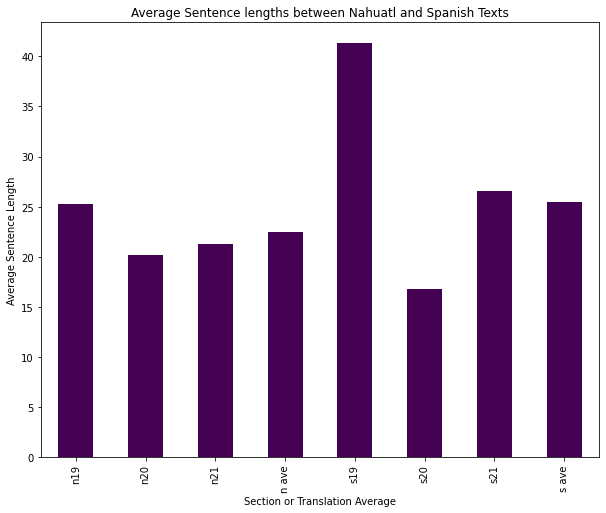

In [22]:
sen_dic = {'n19':n19_ave, #Dictionary of individual section sentence length averages
      'n20':n20_ave,
      'n21':n21_ave,
      'n ave': n_ave,
       's19':s19_ave,
      's20':s20_ave,
      's21':s21_ave,
      's ave': s_ave
      }
senlens = pd.Series(sen_dic) #Convert dict into pd.Series to plot it

senlens.plot(kind='bar',figsize=(10,8),title='Average Sentence lengths between Nahuatl and Spanish Texts', colormap='viridis')
plt.xlabel('Section or Translation Average')
plt.ylabel('Average Sentence Length')
plt.savefig('sentence_lengths.png',transparent=True)

In [23]:
#Nahuatl UPOS usage as %
n19_pos = 100 * n19df['upos'].value_counts()/n19df['upos'].value_counts().sum()
n20_pos = 100 * n20df['upos'].value_counts()/n20df['upos'].value_counts().sum()
n21_pos = 100 * n21df['upos'].value_counts()/n21df['upos'].value_counts().sum()

#Spanish UPOS usage as %
s19_pos = 100 * s19df['upos'].value_counts()/s19df['upos'].value_counts().sum()
s20_pos = 100 * s20df['upos'].value_counts()/s20df['upos'].value_counts().sum()
s21_pos = 100 * s21df['upos'].value_counts()/s21df['upos'].value_counts().sum()

supos_ave = 100 * spanishdf['upos'].value_counts()/spanishdf['upos'].value_counts().sum()
nupos_ave = 100 * nahuatldf['upos'].value_counts()/nahuatldf['upos'].value_counts().sum()

#Dictionary out of percentages of used UPOS in each section
pos_dic = {'n_ave':nupos_ave,
           'n19':n19_pos,
           'n20':n20_pos,
           'n21':n21_pos,
           's_ave':supos_ave,
           's19':s19_pos,
           's20':s20_pos,
           's21':s21_pos} 

In [24]:
posdf = pd.DataFrame(pos_dic) #Dataframe of UPOS dic showing % of UPOS used
posdf

,n_ave,n19,n20,n21,s_ave,s19,s20,s21
ADJ,3.073119,3.035413,2.875399,3.238469,3.751144,4.032258,3.829787,3.606557
ADP,10.349700,12.478921,9.584665,8.341511,11.619396,13.306452,14.468085,9.836066
ADV,3.991522,3.035413,4.632588,4.710500,4.117109,4.435484,0.851064,5.245902
AUX,5.192511,4.300169,4.472843,6.673209,4.025618,3.225806,3.404255,4.590164
CCONJ,4.768633,4.300169,4.952077,5.201178,3.751144,0.403226,2.978723,5.409836
DET,7.983045,8.516020,9.424920,6.476938,11.070448,12.903226,13.191489,9.508197
NOUN,16.001413,20.067454,15.335463,11.678116,13.083257,12.903226,14.893617,12.459016
NUM,0.565171,0.590219,NaN,0.883219,0.640439,NaN,0.425532,0.983607
PART,1.695514,1.433390,1.437700,2.158979,2.195791,3.225806,1.702128,1.967213
PRON,12.787001,11.973019,11.341853,14.622179,10.064044,7.661290,9.787234,11.147541


In [25]:
#Barplot of UPOS usage as %
#posdf.plot(kind='bar',figsize=(15,12),title='Use of UPOS by translation and section as a %')

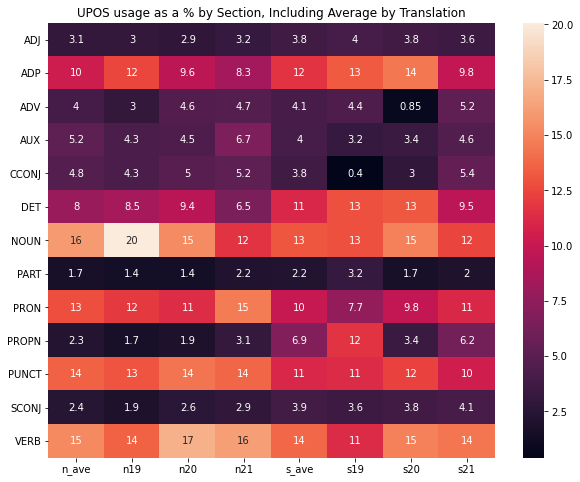

In [26]:
#Seaborn heatmap of upos usage as a % by section, and ave
plt.figure(figsize=(10,8))
plt.title('UPOS usage as a % by Section, Including Average by Translation')
sns.heatmap(posdf.dropna(), annot=True)
plt.savefig('upos.png')

# Word Choice

In [27]:
#nahuatldf['text'].value_counts().head(50) #Mexica 14, Spaniards 13, Warriors 9

In [28]:
#spanishdf['text'].value_counts().head(50) #Spaniards 16, Moteccoma 12, Mexica 6, Indians 6

In [29]:
import nltk #NLP Tool
nltk.download('stopwords') #Use NLTK stopwords list

[nltk_data] Downloading package stopwords to /home/neon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [54]:
share_words = [] #Empty list to hold shared words
for key in dict(nahuatldf['text'].value_counts()): #Iterate through words in nahuatl text
    if key.lower() not in stopwords and len(key.lower()) > 5: #If the word isn't stopwords or < 5
        if key.lower() in dict(spanishdf['text'].value_counts()): #If the word meets above criteria + in spanish text
            share_words.append(key.lower()) #THEN, add the word to share_words

In [142]:
#Words the nahuatldf shares with spanish df and their frequency
print(nahuatldf[nahuatldf['text'].apply(lambda word: word in share_words) == True]['text'].value_counts().head(10))
print(spanishdf[spanishdf['text'].apply(lambda word: word in share_words) == True]['text'].value_counts().head(10))

painted      11
arrows        8
people        8
saying        8
killed        7
someone       7
places        6
festivity     6
everyone      6
various       5
Name: text, dtype: int64
killed        7
festivity     5
saying        4
leaders       3
surrounded    3
outside       3
palace        3
ordered       2
performing    2
people        2
Name: text, dtype: int64


In [108]:
words_dic = {"Nahuatl":nahuatldf[nahuatldf['text'].apply(lambda word: word in share_words) == True]['text'].value_counts(),
"Spanish":spanishdf[spanishdf['text'].apply(lambda word: word in share_words) == True]['text'].value_counts()}

sharewordsdf = pd.DataFrame(words_dic)
sharewordsdf['n'] = sharewordsdf['Nahuatl'].apply(lambda x: x > 1)
sharewordsdf['s'] = sharewordsdf['Spanish'].apply(lambda x: x > 1)

sharewordsdf['Nahuatl'] = sharewordsdf[sharewordsdf['n']==True]['Nahuatl']
sharewordsdf['Spanish'] = sharewordsdf[sharewordsdf['s']==True]['Spanish']

sharewordsdf.drop(['n','s'],axis=1,inplace=True)
sharewordsdf.dropna(inplace=True)
sharewordsdf

,Nahuatl,Spanish
arrows,8.0,2.0
festivity,6.0,5.0
killed,7.0,7.0
leaders,3.0,3.0
palace,2.0,3.0
people,8.0,2.0
saying,8.0,4.0
secretly,2.0,2.0


In [121]:
#Dictionary holding shared words and their usage frequency as %
word_perc_dic = {"Nahuatl":100 * sharewordsdf['Nahuatl'] / sharewordsdf['Nahuatl'].sum(),
                 "Spanish":100 * sharewordsdf['Spanish'] / sharewordsdf['Spanish'].sum()}

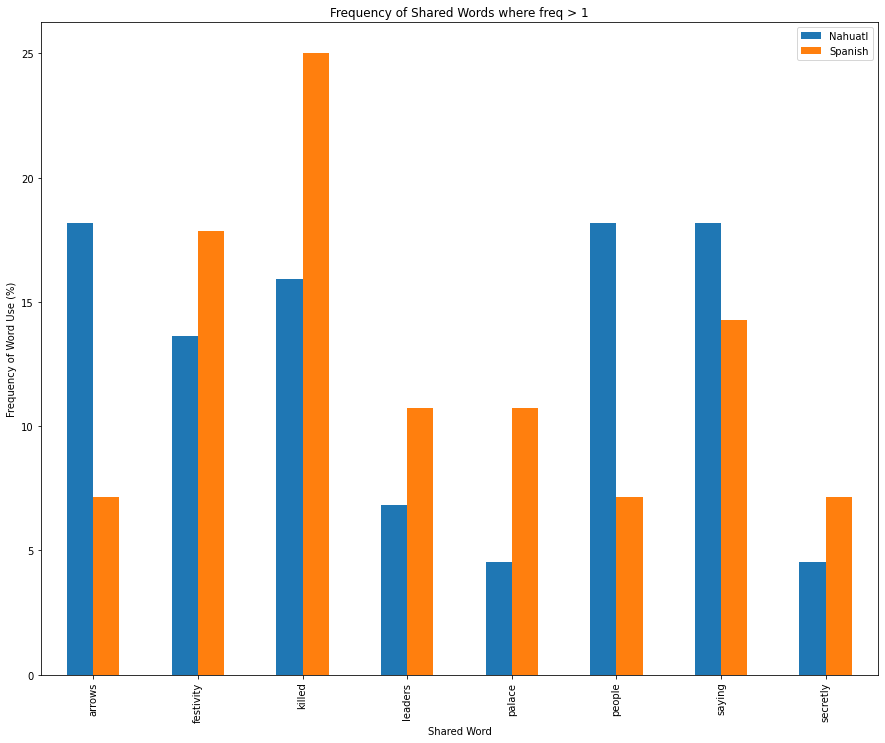

In [132]:
#Create dataframe and plot shared words and their usage frequency
pd.DataFrame(word_perc_dic).plot(kind='bar',figsize=(15,12),title='Frequency of Shared Words where freq > 1')
plt.xlabel('Shared Word')
plt.ylabel('Frequency of Word Use (%)')
plt.savefig('share_words.png',transparent=True)

# Sentiment Analysis

In [35]:
n_sentimentdf = pd.concat([n19_sentimentdf,  #Master df of nahuatl sentence sentiments
                           n20_sentimentdf,
                           n21_sentimentdf])
n_sentimentdf['translation'] = 'Nahuatl' #Add in column to identify them later

In [36]:
s_sentimentdf = pd.concat([s19_sentimentdf, #Master df of spanish sentence sentiments
                           s20_sentimentdf,
                           s21_sentimentdf])
s_sentimentdf['translation'] = 'Spanish' #Add in column to identify them later

In [201]:
sentiments = pd.concat([n_sentimentdf,s_sentimentdf]) #Master sentiment df

In [199]:
#Dic of master sentiment df AS PERCENTAGE --> master df for all sentiments, with text translation id
mydic = {'Nahuatl Sentiments':100 * sentiments[sentiments['translation']=='Nahuatl']['sentiment'].value_counts() / sentiments[sentiments['translation']=='Nahuatl']['sentiment'].value_counts().sum(),
         'Spanish Sentiments':100 * sentiments[sentiments['translation']=='Spanish']['sentiment'].value_counts() / sentiments[sentiments['translation']=='Spanish']['sentiment'].value_counts().sum()}
perc_sentiments = pd.DataFrame(mydic,index=[0,1,2])

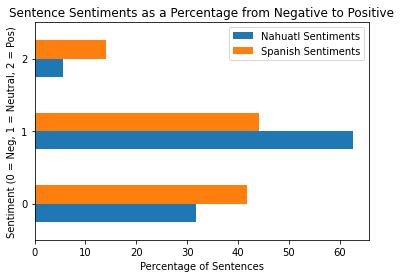

In [139]:
#Plot of sentiments by translation per sentence
perc_sentiments.plot(kind='barh')
plt.title('Sentence Sentiments as a Percentage from Negative to Positive')
plt.xlabel('Percentage of Sentences')
plt.ylabel('Sentiment (0 = Neg, 1 = Neutral, 2 = Pos)')
plt.savefig('perc_sentiments.png',transparent=True)

In [40]:
perc_sentiments

,Nahuatl Sentiments,Spanish Sentiments
0,31.746032,41.860465
1,62.698413,44.186047
2,5.555556,13.953488


In [41]:
#Nahuatl has 1.4x more neutral statements
62.698413/44.186047

1.4189640680009235

In [42]:
#Spanish has 1.3x more negative statemetns
41.860465/31.746032

1.3186046369511628

In [43]:
#Spanish has 2.5x more positive statements
13.953488/5.555556

2.511627639069789

# Bag of Words + Sentiment Analysis Exploration

Yes, stanza already tokenized & annotated the text. I am essentially doing it again using some NLTK and SKLearn tools.

In [202]:
sentiments.reset_index(inplace=True) #Reset index from hierarchical index
sentiments['text'][0] #test new index

'Nineteenth chapter, where it is said\nhow the Spaniards ordered the Mexica to\nhold the festivity of Huitzilopochtli.'

In [174]:
import string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [205]:
sentiments['text'].head(5).apply(text_process) #Test the function

0    [Nineteenth, chapter, said, Spaniards, ordered...
1    [happened, Captain, present, time, went, coast...
2    [afterward, Pedro, de, Alvarado, requested, fe...
3    [Thereupon, Moteuccoma, gave, orders, subordin...
4    [announcement, came, Moteuccoma, detained, wom...
Name: text, dtype: object

In [206]:
sentiments['text'].head(5) #Compare to Original

0    Nineteenth chapter, where it is said\nhow the ...
1    But\nwhen this happened the Captain was not\np...
2    And afterward Pedro de Alvarado requested the ...
3    Thereupon Moteuccoma gave the orders;\nthose o...
4    And when the announcement came out from where ...
Name: text, dtype: object

In [183]:
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(sentiments['text']) #Vectorizer

In [187]:
print(len(bow_transformer.vocabulary_)) #Total vocab words

803


In [211]:
#Test of vectorizer
test_text = sentiments['text'][0] #original
print(test_text)

Nineteenth chapter, where it is said
how the Spaniards ordered the Mexica to
hold the festivity of Huitzilopochtli.


In [212]:
bow0 = bow_transformer.transform([test_text])

In [213]:
print(bow0)
print(bow0.shape) #It works! 9 unique words

  (0, 23)	1
  (0, 29)	1
  (0, 36)	1
  (0, 45)	1
  (0, 176)	1
  (0, 298)	1
  (0, 374)	1
  (0, 512)	1
  (0, 604)	1
(1, 803)
